(starry)=

# Starry light curve

```{warning}
Experimental features!
```

```{warning}
Notebook under construction!
```

*jaxoplanet* aims to match the features of starry, a framework to compute the light curves of systems made of of non-uniform spherical bodies. In this small tutorial we demonstrate some of these features.


We start by defining two bodies and their associated surface maps

In [1]:
import numpy as np

from jaxoplanet.orbits.keplerian import Central
from jaxoplanet.experimental.starry import Surface, Ylm, show_surface
from jaxoplanet.experimental.starry.orbit import SurfaceSystem

y = Ylm.from_dense(np.hstack([1.0, np.random.rand(10) * 1e-1]))
central_surface = Surface(y=y, inc=0.9, obl=-0.3, period=1.2, u=[0.5, 0.5])
central = Central(radius=1.0, mass=0.8)

y = Ylm.from_dense(np.hstack([1.0, np.random.rand(10) * 0.3]))
body_surface = Surface(y=y, inc=2.5, obl=0.3, period=-0.8, u=[0.5, 0.3], amplitude=0.6)
body = {
    "radius": 0.5,
    "mass": 0.6,
    "period": 1.0,
    "surface": body_surface,
}

system = SurfaceSystem(central, central_surface).add_body(**body)

In [2]:
system

SurfaceSystem(
  central=Central(
    mass=<Quantity(0.8, 'M_sun')>,
    radius=<Quantity(1.0, 'R_sun')>,
    density=<Quantity(0.190985932, 'M_sun / R_sun ** 3')>
  ),
  _body_stack=ObjectStack(...),
  central_surface=Surface(
    y=Ylm(
      data={
        (0, 0):
        1.0,
        (1, -1):
        0.0768130382145799,
        (1, 0):
        0.014900284011770204,
        (1, 1):
        0.017079139510359134,
        (2, -2):
        0.0919687451518207,
        (2, -1):
        0.011707719323406552,
        (2, 0):
        0.031269041516621535,
        (2, 1):
        0.023252516290866054,
        (2, 2):
        0.08281934461950434,
        (3, -3):
        0.07812492567090619,
        (3, -2):
        0.027702454798702036
      },
      ell_max=3,
      diagonal=False
    ),
    inc=0.9,
    obl=-0.3,
    u=(0.5, 0.5),
    period=1.2,
    amplitude=1.0,
    normalize=True
  ),
  _body_surface_stack=ObjectStack(...)
)

These maps can be shown with

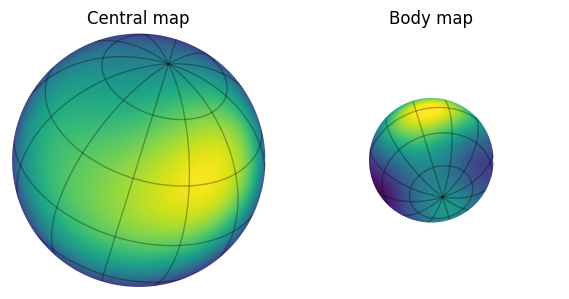

In [3]:
import matplotlib.pyplot as plt


def lim():
    radius = central.radius.magnitude
    plt.xlim(-radius, radius)
    plt.ylim(-radius, radius)


plt.figure(figsize=(6, 3))
plt.subplot(121)
show_surface(central_surface, vmax=0.4)
plt.title("Central map")
lim()
plt.subplot(122)
show_surface(body_surface, radius=body["radius"], vmax=0.4)
lim()
plt.title("Body map")
_ = plt.tight_layout()

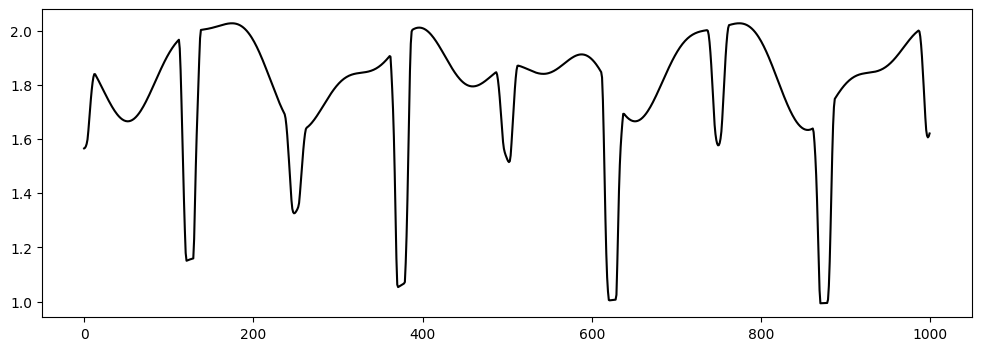

In [4]:
from jaxoplanet.experimental.starry.light_curves import light_curve

time = np.linspace(-2.0, 2.0, 1000)
flux = light_curve(system)(time)

plt.figure(figsize=(12, 4))
_ = plt.plot(flux, c="k")